In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#  reading the csv file into a dataframe
health = pd.read_csv("insurance.csv")
health.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
health.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [5]:
#Checking for null values
health.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
health.fillna(0,inplace=True)

In [7]:
health.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
health.loc[health["sex"] ==0]

,age,sex,bmi,children,smoker,region,charges


# Exploratory Data Analysis

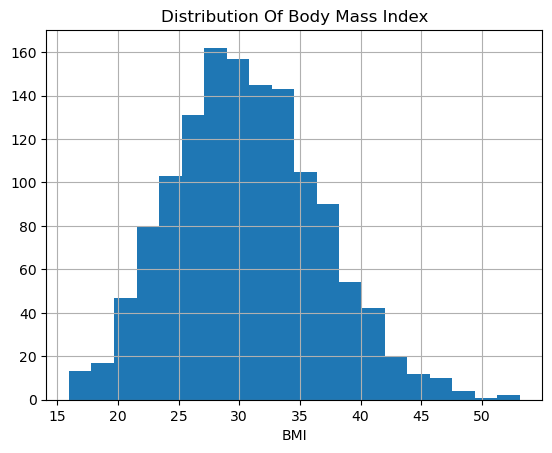

In [10]:
health["bmi"].hist(bins=20)
plt.xlabel("BMI")
plt.title("Distribution Of Body Mass Index");

This shows the body mass index is slightly skewed, with most of the values falling between 25 and 35.

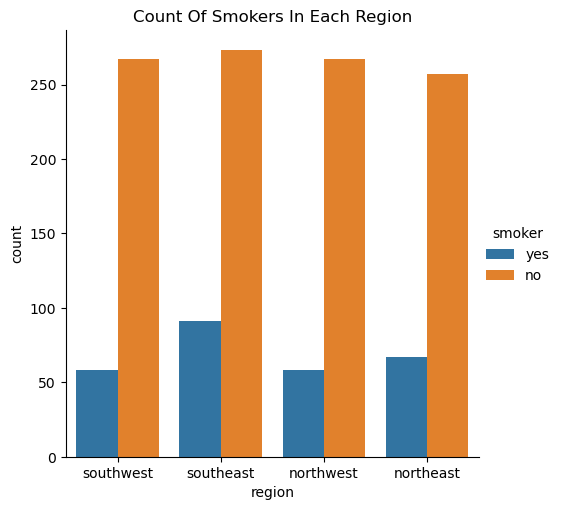

In [12]:
sns.catplot(x ="region", hue="smoker", data=health, kind="count")
plt.title("Count Of Smokers In Each Region");

This clearly indicates that non-smokers are a lot more than smokers in each region and the southeast has the highest number of smokers.

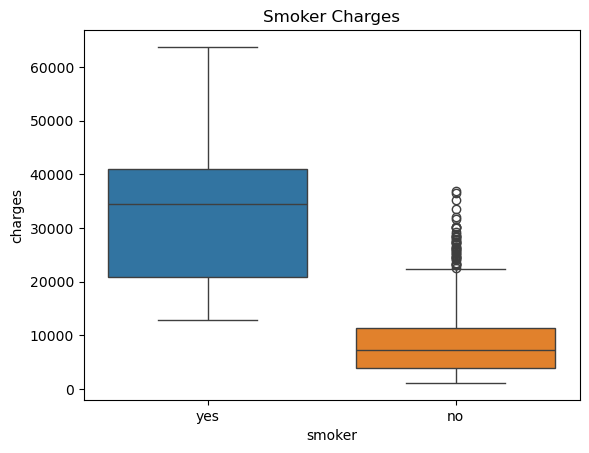

In [14]:
sns.boxplot(x="smoker", y="charges",hue="smoker",data=health)
plt.title("Smoker Charges");

This shows smokers have a much higher charge than non-smokers. 

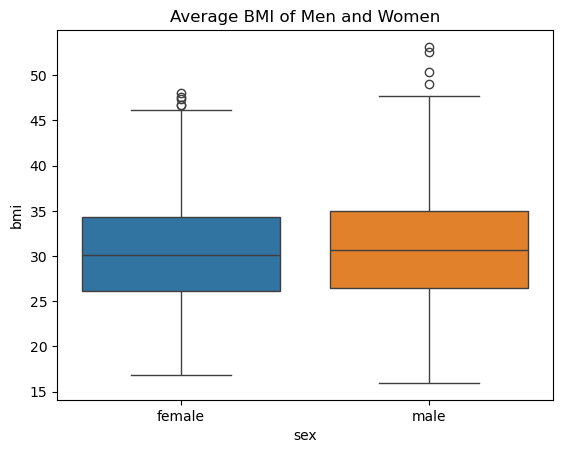

In [16]:
sns.boxplot(y="bmi", x="sex",hue="sex", data=health)
plt.title("Average BMI of Men and Women");

This shows that men have a slightly higher mean bmi than women. 

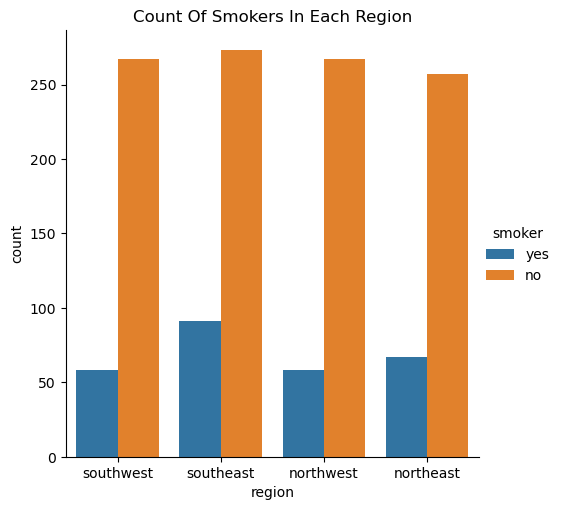

In [18]:
sns.catplot(x ="region", hue="smoker", data=health, kind="count")
plt.title("Count Of Smokers In Each Region");

This clearly indicates that non-smokers are a lot more than smokers in each region and the southeast has the highest number of smokers.

In [20]:
health.groupby("region")["children"].sum()

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

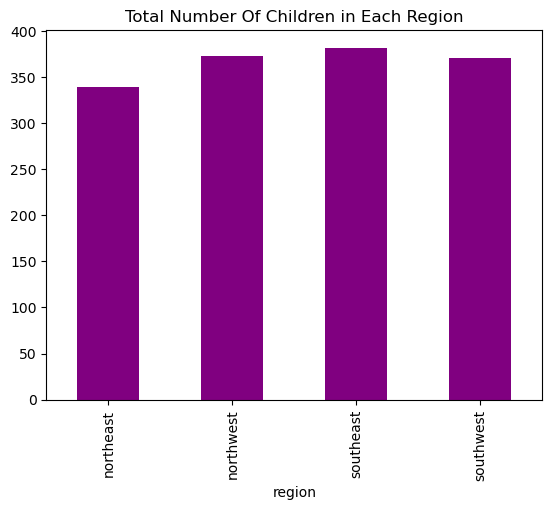

In [21]:
health.groupby("region")["children"].sum().plot(kind="bar",color="purple")
plt.title("Total Number Of Children in Each Region");

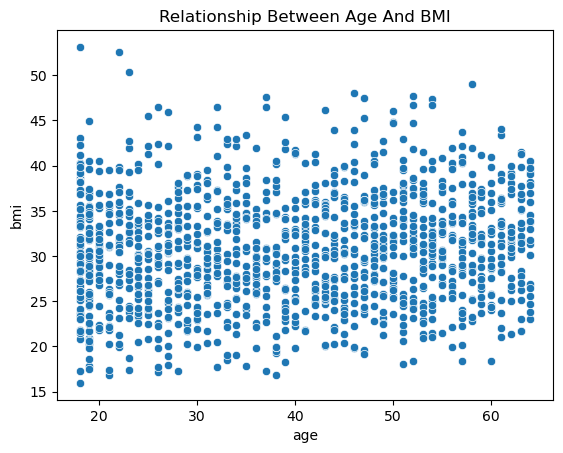

In [22]:
sns.scatterplot(x="age", y="bmi", data=health)
plt.title("Relationship Between Age And BMI");

There is no apparent relationship between Age and BMI

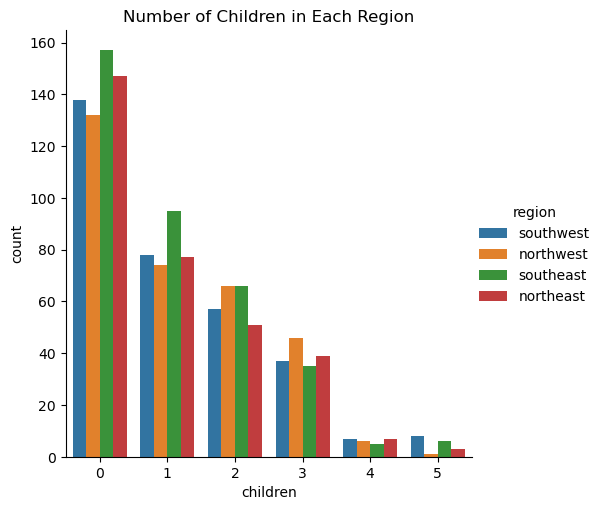

In [24]:
sns.catplot(x="children", hue="region", data=health, kind="count")
plt.title("Number of Children in Each Region");

It would seem that the southeast has the highest number of children.

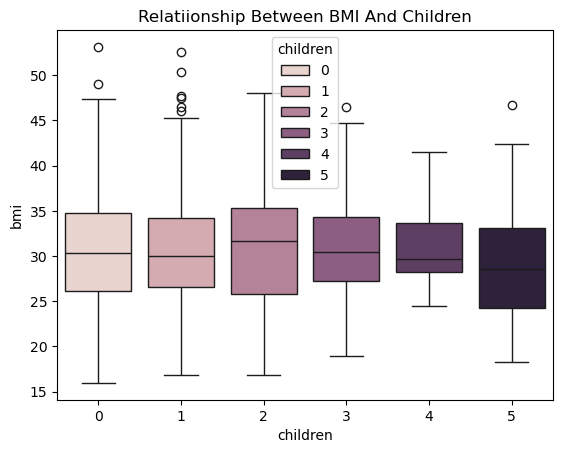

In [26]:
sns.boxplot(x="children", y="bmi",data=health,hue="children")
plt.title("Relatiionship Between BMI And Children");

It can be seen that people with two or fewer children have a more higher BMI than others.

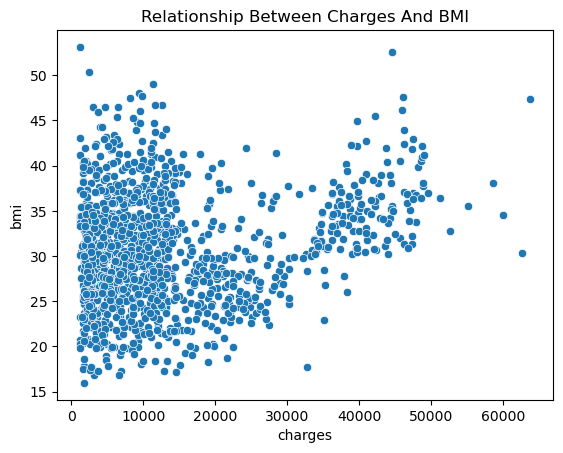

In [28]:
sns.scatterplot(x="charges", y="bmi", data=health)
plt.title("Relationship Between Charges And BMI");

It can be noticed that people with higher charges have a BMI of at least 30. 

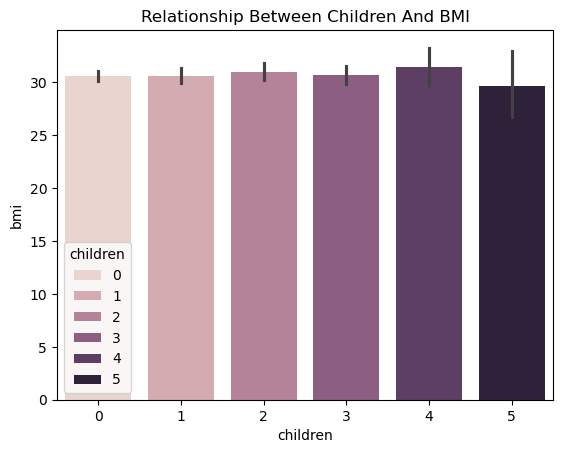

In [30]:
sns.barplot(x="children", y="bmi", data=health, hue="children")
plt.title("Relationship Between Children And BMI");

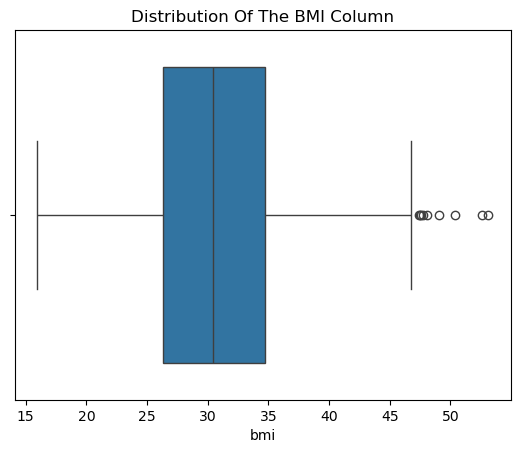

In [31]:
sns.boxplot(x="bmi", data=health)
plt.title("Distribution Of The BMI Column");

There are a few outliers in the BMI column from about 47 upwards.

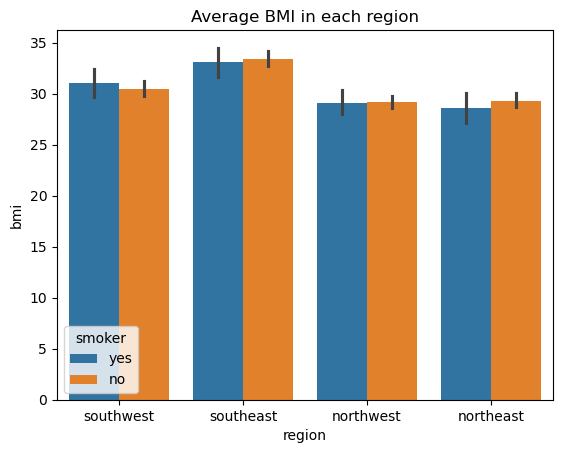

In [33]:
sns.barplot(x="region", y="bmi", hue="smoker", data=health)
plt.title("Average BMI in each region");

It can be seen that the southeast have a higher BMI in both smokers and non smokers than any other region.

In [35]:
health.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


# Model Building

## Data Preprocessing

In [37]:
#converting the sex column to numerical
health["sex"] = health["sex"].map({"male":0,"female":1})
health["smoker"] = health["smoker"].map({"yes":0,"no":1})
health["region"] = health["region"].map({"southwest": 0, "southeast": 1, "northwest": 2, "northeast": 3})

health.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [39]:
labelencoder = LabelEncoder()
health["region"] = labelencoder.fit_transform(y=health["region"])
print(health["region"])

0       0
1       1
2       1
3       2
4       2
       ..
1333    2
1334    3
1335    1
1336    0
1337    2
Name: region, Length: 1338, dtype: int64


In [40]:
ohe = OneHotEncoder()

In [41]:
#df['sex'].reshape(1,-1)
health["sex"] = labelencoder.fit_transform(health["sex"])
health["sex"]

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    1
1335    1
1336    1
1337    1
Name: sex, Length: 1338, dtype: int64

In [42]:
health["smoker"] = labelencoder.fit_transform(health["smoker"])
health["smoker"]

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    1
1335    1
1336    1
1337    0
Name: smoker, Length: 1338, dtype: int64

In [43]:
health.corr()["charges"]

age         0.299008
sex        -0.057292
bmi         0.198341
children    0.067998
smoker     -0.787251
region      0.006208
charges     1.000000
Name: charges, dtype: float64

In [44]:
X = health.drop(columns="charges")
y = health["charges"]

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(1070, 6)

In [46]:
y_train.shape

(1070,)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [49]:
X_train_scaled

array([[ 0.47222651,  1.0246016 , -1.75652513,  0.73433626,  0.50874702,
         0.45611589],
       [ 0.54331294,  1.0246016 , -1.03308239, -0.91119211,  0.50874702,
         1.35325561],
       [ 0.8987451 ,  1.0246016 , -0.94368672, -0.91119211,  0.50874702,
        -0.44102382],
       ...,
       [ 1.3252637 , -0.97598911, -0.89153925, -0.91119211,  0.50874702,
         1.35325561],
       [-0.16755139,  1.0246016 ,  2.82086429,  0.73433626, -1.96561348,
        -1.33816354],
       [ 1.1120044 , -0.97598911, -0.10932713, -0.91119211,  0.50874702,
        -1.33816354]])

## Model Selection

### Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train_scaled,y_train)

In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
model.score(X_test_scaled, y_test)

0.7833237659369185

In [55]:
model.predict(X_test_scaled).round()

array([ 9176.,  7228., 37309.,  9761., 27237., 10716.,   399., 17014.,
        1336., 11488., 28434.,  9580.,  5434., 38653., 40490., 37369.,
       15285., 36198.,  9348., 31860.,  4039., 10177.,  2352.,  7033.,
       11583., 13040., 14522.,  6350., 10154.,  2293.,  9244., 13258.,
        4614.,  3761.,  4484., 12982.,  2046.,  8881., 33753., 32865.,
        4015.,  4450., 14155., 11707.,  8882., 12240.,  5389.,  3296.,
       35819.,  9214., 15972.,  2490., 12384.,  1569., 13534., 12689.,
        4468., 32481., 13359., 12964., 14237., 10497., 16420.,  8052.,
       11939.,  4281., 26962., 11244.,  2401.,  6062., 10723., 11731.,
       11123.,  9340., 12035.,  6911.,  7320., 11009.,  6718.,  8936.,
        3840., 36995.,  6440., 30999., 34832., 35534.,  7202., 13026.,
       10148., 14505., 17750., 35769., 33383.,  6321., 32264.,  9529.,
       29807.,  3752., 28782.,  6031.,  5596.,  1887., 11521., 15122.,
       11929.,  4368., 10106., 32223.,    69., 33325.,  3222., 10094.,
      

In [56]:
#prediction for Linear Regression
prediction = model.predict(X_test_scaled).round()

In [57]:
#checking for accuracy for LinerRegression
from sklearn.metrics import r2_score 

In [58]:
r2_score(y_test,prediction)*100

78.33236504095585

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
cross_val_score(model, X, y, cv=15)

array([0.80323852, 0.69902073, 0.76020909, 0.76436995, 0.67970975,
       0.63528752, 0.76989256, 0.81732063, 0.72806653, 0.80963144,
       0.75687013, 0.61288271, 0.78274928, 0.72827861, 0.7422704 ])

In [61]:
lr_pred = model.predict(X_test_scaled)

In [62]:
comparison = pd.DataFrame({"Actual Values": y_test,"Predictions": prediction})
comparison.head()

,Actual Values,Predictions
764,9095.06825,9176.0
887,5272.17580,7228.0
890,29330.98315,37309.0
1293,9301.89355,9761.0
259,33750.29180,27237.0


# Ridge Regression

In [64]:
from sklearn.linear_model import Ridge

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
r_model = Ridge(alpha = 0.1)
r_model.fit(X_train_scaled, y_train)

Ridge(alpha=0.1)

In [67]:
r_model.score(X_test_scaled, y_test)

0.7833203960363828

In [68]:
cross_val_score(r_model, X, y, cv=15)

array([0.80318195, 0.69912786, 0.76022161, 0.76433115, 0.67981802,
       0.63532463, 0.76979417, 0.81724212, 0.72816808, 0.8095965 ,
       0.75688907, 0.61298976, 0.78265278, 0.72829743, 0.74230539])

In [69]:
r_pred = r_model.predict(X_test_scaled)

In [70]:
r_comparison = pd.DataFrame({"Actual Values": y_test,"Predictions": r_pred})
r_comparison.head()

,Actual Values,Predictions
764,9095.06825,9176.674882
887,5272.17580,7228.476481
890,29330.98315,37306.412151
1293,9301.89355,9761.338001
259,33750.29180,27235.925074


# Lasso Regression

In [72]:
from sklearn.linear_model import Lasso

In [73]:
lr_model = Lasso(alpha = 0.4)
lr_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.4)

In [74]:
lr_model.score(X_test_scaled, y_test)

0.7833170246219312

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
cross_val_score(lr_model, X, y, cv=15)

array([0.8032467 , 0.69903516, 0.76021017, 0.76435772, 0.67977115,
       0.63531115, 0.76987757, 0.81729521, 0.72807993, 0.80964132,
       0.75688446, 0.6129061 , 0.78273144, 0.7282879 , 0.74228081])

In [77]:
ls_pred = lr_model.predict(X_test_scaled)

In [78]:
ls_comparison = pd.DataFrame({"Actual Values": y_test,"Predictions": ls_pred})
ls_comparison.head()

,Actual Values,Predictions
764,9095.06825,9175.440754
887,5272.17580,7228.020693
890,29330.98315,37307.367683
1293,9301.89355,9760.937941
259,33750.29180,27237.291605


# Decision Tree Regressor

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
dc_model = DecisionTreeRegressor(max_depth = 3, random_state=14)

In [82]:
dc_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=3, random_state=14)

In [83]:
import warnings
warnings.filterwarnings("ignore")

In [84]:
dc_model.score(X_test_scaled, y_test)

0.8593200072858882

In [85]:
cross_val_score(dc_model, X, y, cv=15)

array([0.89833558, 0.82176668, 0.87053808, 0.83742132, 0.8155989 ,
       0.64893614, 0.85980552, 0.87866518, 0.92594845, 0.88633023,
       0.82887134, 0.75587512, 0.88496955, 0.81489643, 0.85863155])

In [86]:
dtr_pred = dc_model.predict(X_test_scaled)

In [87]:
dtr_comparison = pd.DataFrame({"Actual Values": y_test,"Predictions": dtr_pred})
dtr_comparison.head()

,Actual Values,Predictions
764,9095.06825,10406.771387
887,5272.17580,6350.825424
890,29330.98315,24994.450730
1293,9301.89355,10406.771387
259,33750.29180,36691.432425


# Hyper parameter Optimization

In [89]:
dc_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 14,
 'splitter': 'best'}

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
dc_params = {"max_depth":[2,3,4,5]}

In [92]:
dc_grid = GridSearchCV(estimator=dc_model, param_grid=dc_params, scoring="neg_mean_squared_error", cv=5, verbose=5)

In [93]:
dc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............max_depth=2;, score=-26629215.509 total time=   0.0s
[CV 2/5] END ...............max_depth=2;, score=-20664312.537 total time=   0.0s
[CV 3/5] END ...............max_depth=2;, score=-25651182.201 total time=   0.0s
[CV 4/5] END ...............max_depth=2;, score=-30216872.110 total time=   0.0s
[CV 5/5] END ...............max_depth=2;, score=-25507079.986 total time=   0.0s
[CV 1/5] END ...............max_depth=3;, score=-25314883.116 total time=   0.0s
[CV 2/5] END ...............max_depth=3;, score=-15730384.422 total time=   0.0s
[CV 3/5] END ...............max_depth=3;, score=-22532380.368 total time=   0.0s
[CV 4/5] END ...............max_depth=3;, score=-27896373.333 total time=   0.0s
[CV 5/5] END ...............max_depth=3;, score=-25020567.387 total time=   0.0s
[CV 1/5] END ...............max_depth=4;, score=-24294767.004 total time=   0.0s
[CV 2/5] END ...............max_depth=4;, score=-

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=3, random_state=14),
             param_grid={'max_depth': [2, 3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=5)

In [94]:
dc_grid.best_params_

{'max_depth': 4}

In [95]:
dc_grid.best_estimator_.score(X_test, y_test)

0.8641310379678357

# Model Evaluation

In [97]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [98]:
mde_pred = dc_grid.predict(X_test)

In [99]:
# Make predictions and evaluate
print("MAE:", mean_absolute_error(y_test,mde_pred))
print("MSE:", mean_squared_error(y_test, mde_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, mde_pred)))

MAE: 2697.765430538481
MSE: 21093484.004597444
RMSE: 4592.764309715603


In [100]:
print("MAE:", mean_absolute_error(y_test, dtr_pred))
print("MSE:", mean_squared_error(y_test, dtr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, dtr_pred)))

MAE: 2969.100036875971
MSE: 21840390.415137794
RMSE: 4673.37034859616
